In [1]:
import pandas as pd
import os

In [2]:
RESULT_FINAL_DIR = 'result/'
MODEL_FINAL_DIR = 'models/'

In [3]:
result = pd.read_csv(os.path.join(RESULT_FINAL_DIR, 'result.csv'))

In [4]:
result

,model,layer,fold,accuracy,precision,recall,f1_score,confusion_matrix
0,dense,1,1,0.848837,0.826087,0.883721,0.853933,"[[140, 32], [20, 152]]"
1,dense,1,2,0.854651,0.821053,0.906977,0.861878,"[[138, 34], [16, 156]]"
2,dense,1,3,0.866279,0.853933,0.883721,0.868571,"[[146, 26], [20, 152]]"
3,dense,1,4,0.880814,0.865922,0.901163,0.883191,"[[148, 24], [17, 155]]"
4,dense,1,5,0.845930,0.802030,0.918605,0.856369,"[[133, 39], [14, 158]]"
...,...,...,...,...,...,...,...,...
85,bigru,3,1,0.866279,0.850000,0.889535,0.869318,"[[145, 27], [19, 153]]"
86,bigru,3,2,0.843023,0.804124,0.906977,0.852459,"[[134, 38], [16, 156]]"
87,bigru,3,3,0.831395,0.785000,0.912791,0.844086,"[[129, 43], [15, 157]]"
88,bigru,3,4,0.843023,0.804124,0.906977,0.852459,"[[134, 38], [16, 156]]"


In [5]:
result = result.groupby(['model', 'layer']).mean().reset_index().drop(columns=['fold'])
result

C:\Users\KEY\AppData\Local\Temp\ipykernel_2440\153209410.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = result.groupby(['model', 'layer']).mean().reset_index().drop(columns=['fold'])


,model,layer,accuracy,precision,recall,f1_score
0,bigru,1,0.860465,0.836362,0.896512,0.865324
1,bigru,2,0.853488,0.828427,0.894186,0.859357
2,bigru,3,0.848256,0.815863,0.901163,0.856059
3,bilstm,1,0.837209,0.802417,0.895349,0.846204
4,bilstm,2,0.818023,0.785346,0.875581,0.827952
5,bilstm,3,0.840116,0.809704,0.891860,0.848263
6,cnn,1,0.866860,0.845679,0.897674,0.870824
7,cnn,2,0.855233,0.832802,0.889535,0.860077
8,cnn,3,0.854651,0.829572,0.893023,0.859952
9,dense,1,0.859302,0.833805,0.898837,0.864788


In [6]:
result.to_excel(os.path.join(RESULT_FINAL_DIR, 'result_mean.xlsx'), index=False)

In [7]:
result.sort_values(by=['f1_score'], ascending=False)

,model,layer,accuracy,precision,recall,f1_score
10,dense,2,0.867442,0.847965,0.896512,0.871260
6,cnn,1,0.866860,0.845679,0.897674,0.870824
11,dense,3,0.865116,0.842987,0.897674,0.869406
0,bigru,1,0.860465,0.836362,0.896512,0.865324
9,dense,1,0.859302,0.833805,0.898837,0.864788
7,cnn,2,0.855233,0.832802,0.889535,0.860077
8,cnn,3,0.854651,0.829572,0.893023,0.859952
1,bigru,2,0.853488,0.828427,0.894186,0.859357
14,gru,3,0.854070,0.834889,0.883721,0.858222
17,lstm,3,0.851163,0.829210,0.886047,0.856335


In [8]:
result_model = result.groupby('model').mean().reset_index().drop(columns=['layer'])
result_model

,model,accuracy,precision,recall,f1_score
0,bigru,0.854070,0.826884,0.897287,0.860247
1,bilstm,0.831783,0.799155,0.887597,0.840806
2,cnn,0.858915,0.836018,0.893411,0.863618
3,dense,0.863953,0.841586,0.897674,0.868485
4,gru,0.847481,0.825306,0.883333,0.852847
5,lstm,0.844574,0.819916,0.884496,0.850655


In [9]:
result_model.sort_values(by=['f1_score'], ascending=False)

,model,accuracy,precision,recall,f1_score
3,dense,0.863953,0.841586,0.897674,0.868485
2,cnn,0.858915,0.836018,0.893411,0.863618
0,bigru,0.854070,0.826884,0.897287,0.860247
4,gru,0.847481,0.825306,0.883333,0.852847
5,lstm,0.844574,0.819916,0.884496,0.850655
1,bilstm,0.831783,0.799155,0.887597,0.840806


In [10]:
result_layer = result.groupby('layer').mean().reset_index()
result_layer

C:\Users\KEY\AppData\Local\Temp\ipykernel_2440\3785046553.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_layer = result.groupby('layer').mean().reset_index()


,layer,accuracy,precision,recall,f1_score
0,1,0.851647,0.824851,0.894186,0.857856
1,2,0.846512,0.822544,0.885465,0.852434
2,3,0.852229,0.827038,0.892248,0.858039


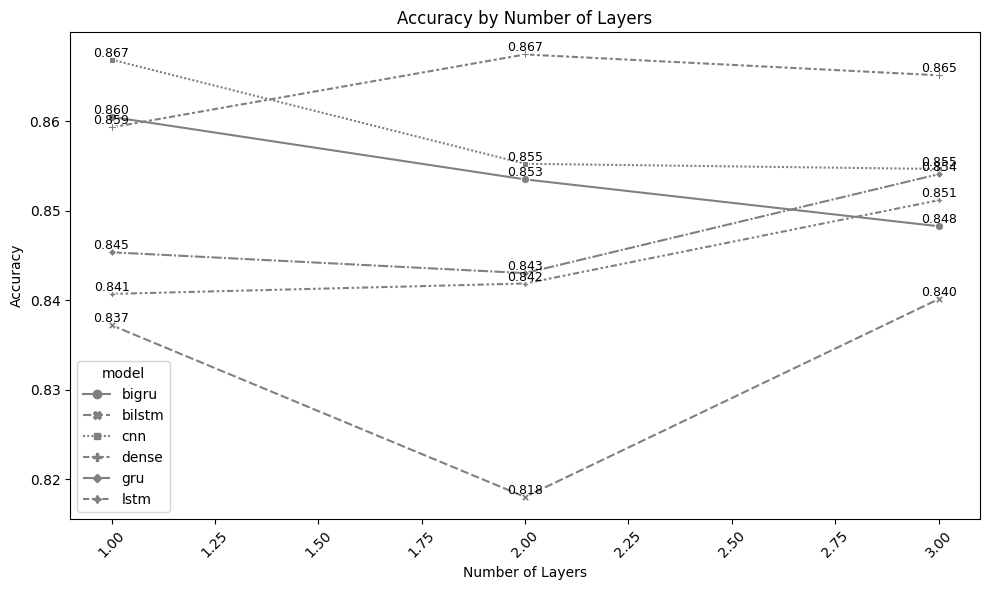

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Buat lineplot: semua warna sama, bedakan dengan style
sns.lineplot(
    data=result,
    x='layer',
    y='accuracy',
    hue='model',
    style='model',
    markers=True,
    dashes=True,
    palette=['grey']*result['model'].nunique()  # semua grey
)

# Loop untuk menambahkan label angka di setiap titik
for dataset_name, dataset_group in result.groupby('model'):
    for i in range(len(dataset_group)):
        x = dataset_group.iloc[i]['layer']
        y = dataset_group.iloc[i]['accuracy']
        plt.text(x, y, f'{y:.3f}', ha='center',
                 va='bottom', fontsize=9, color='black')

plt.title('Accuracy by Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

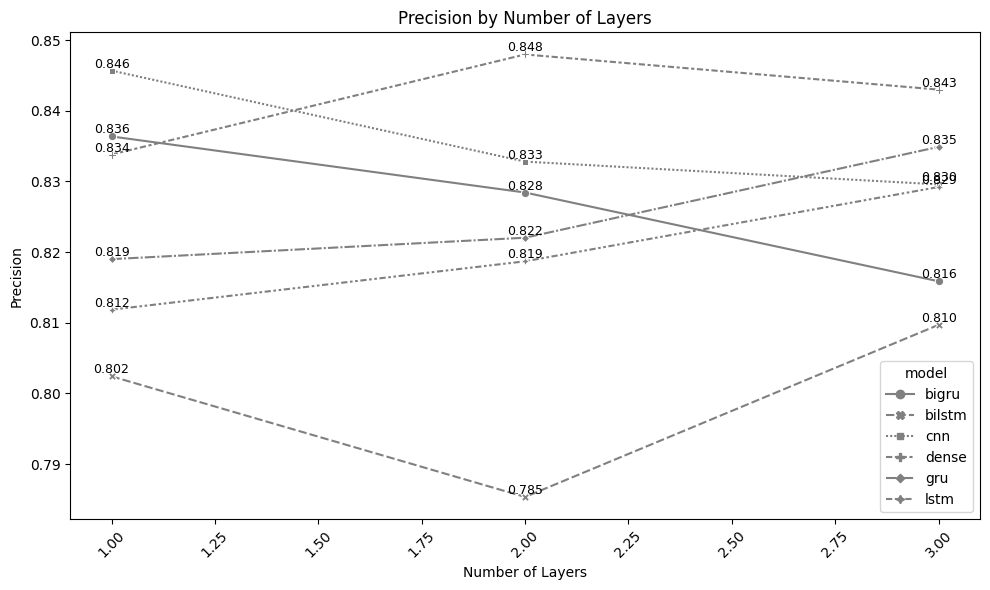

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Buat lineplot: semua warna sama, bedakan dengan style
sns.lineplot(
    data=result,
    x='layer',
    y='precision',
    hue='model',
    style='model',
    markers=True,
    dashes=True,
    palette=['grey']*result['model'].nunique()  # semua grey
)

# Loop untuk menambahkan label angka di setiap titik
for dataset_name, dataset_group in result.groupby('model'):
    for i in range(len(dataset_group)):
        x = dataset_group.iloc[i]['layer']
        y = dataset_group.iloc[i]['precision']
        plt.text(x, y, f'{y:.3f}', ha='center',
                 va='bottom', fontsize=9, color='black')

plt.title('Precision by Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

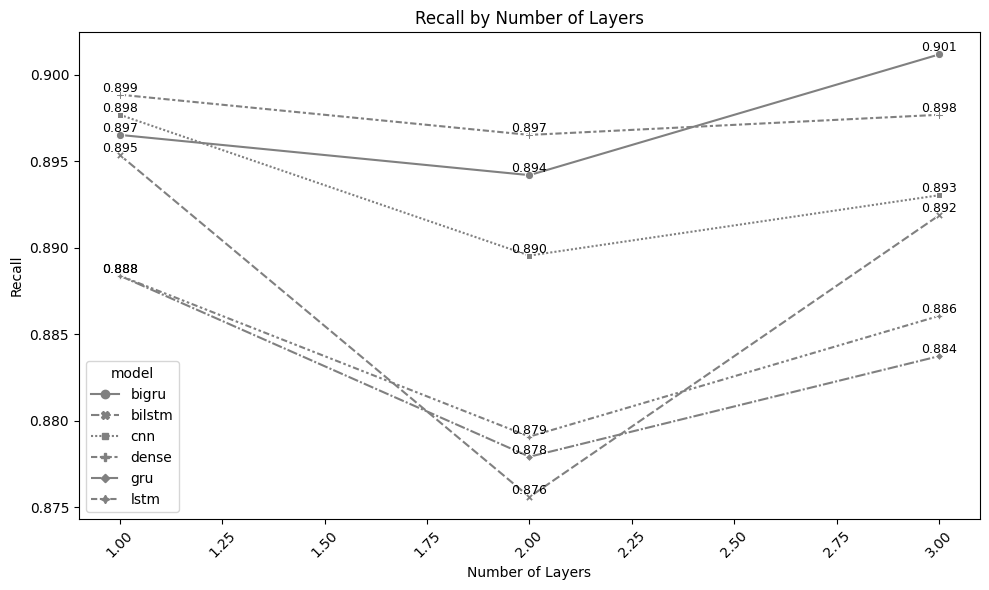

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Buat lineplot: semua warna sama, bedakan dengan style
sns.lineplot(
    data=result,
    x='layer',
    y='recall',
    hue='model',
    style='model',
    markers=True,
    dashes=True,
    palette=['grey']*result['model'].nunique()  # semua grey
)

# Loop untuk menambahkan label angka di setiap titik
for dataset_name, dataset_group in result.groupby('model'):
    for i in range(len(dataset_group)):
        x = dataset_group.iloc[i]['layer']
        y = dataset_group.iloc[i]['recall']
        plt.text(x, y, f'{y:.3f}', ha='center',
                 va='bottom', fontsize=9, color='black')

plt.title('Recall by Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

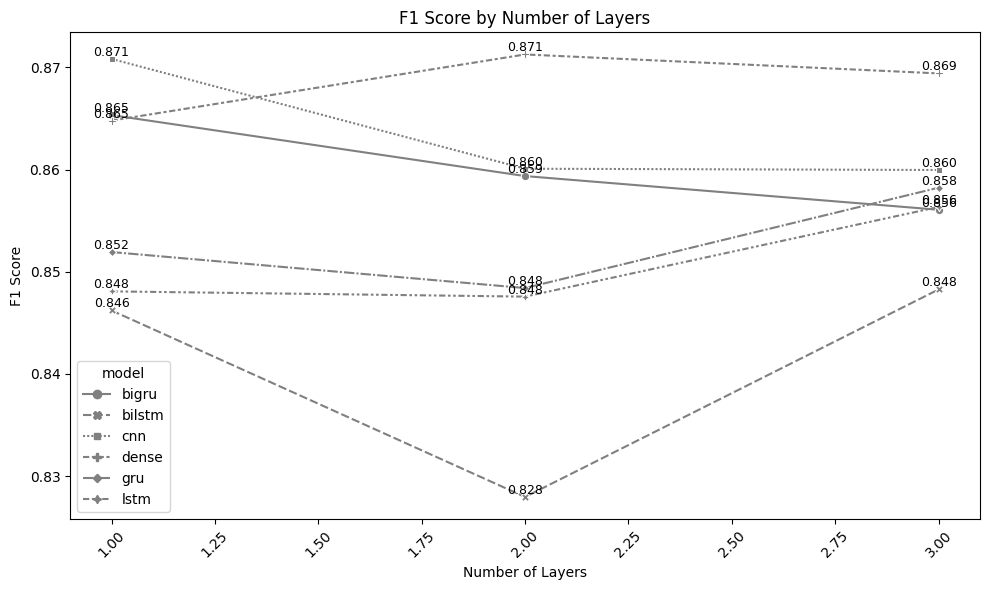

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Buat lineplot: semua warna sama, bedakan dengan style
sns.lineplot(
    data=result,
    x='layer',
    y='f1_score',
    hue='model',
    style='model',
    markers=True,
    dashes=True,
    palette=['grey']*result['model'].nunique()  # semua grey
)

# Loop untuk menambahkan label angka di setiap titik
for dataset_name, dataset_group in result.groupby('model'):
    for i in range(len(dataset_group)):
        x = dataset_group.iloc[i]['layer']
        y = dataset_group.iloc[i]['f1_score']
        plt.text(x, y, f'{y:.3f}', ha='center',
                 va='bottom', fontsize=9, color='black')

plt.title('F1 Score by Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

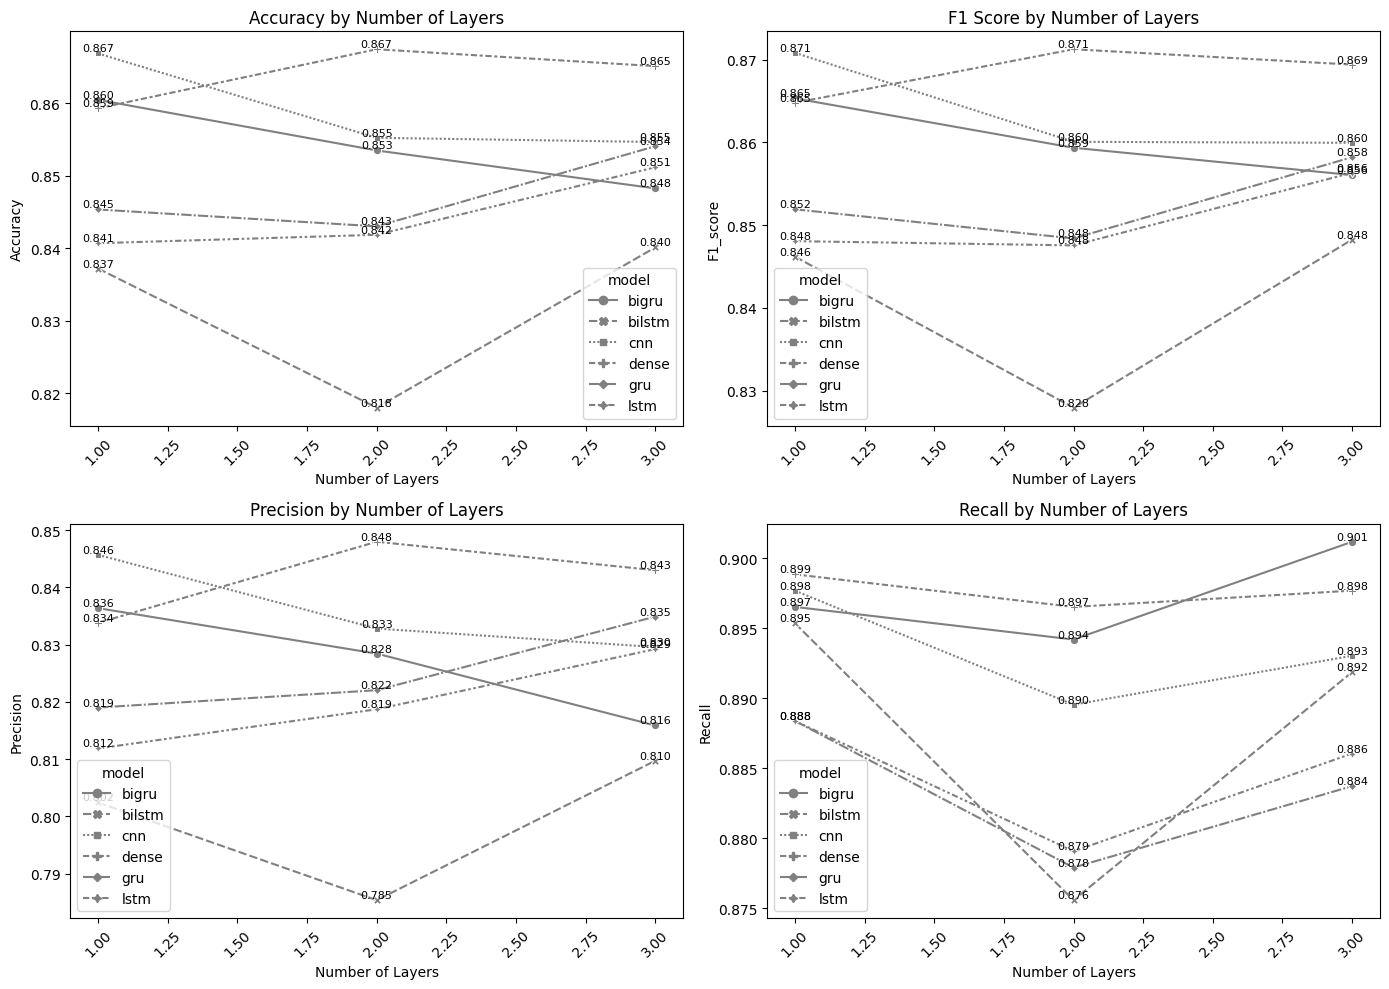

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar metrik dan judul
metrics = ['accuracy', 'f1_score', 'precision', 'recall']
titles = ['Accuracy by Number of Layers',
          'F1 Score by Number of Layers',
          'Precision by Number of Layers',
          'Recall by Number of Layers']

# Buat figure dan axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot untuk setiap metrik
for ax, metric, title in zip(axs.flat, metrics, titles):
    sns.lineplot(
        data=result,
        x='layer',
        y=metric,
        hue='model',
        style='model',
        markers=True,
        dashes=True,
        palette=['grey'] * result['model'].nunique(),
        ax=ax
    )

    # Tambahkan label angka
    for model_name, group in result.groupby('model'):
        for i in range(len(group)):
            x = group.iloc[i]['layer']
            y = group.iloc[i][metric]
            ax.text(x, y, f'{y:.3f}', ha='center', va='bottom',
                    fontsize=8, color='black')

    ax.set_title(title)
    ax.set_xlabel('Number of Layers')
    ax.set_ylabel(metric.capitalize())
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

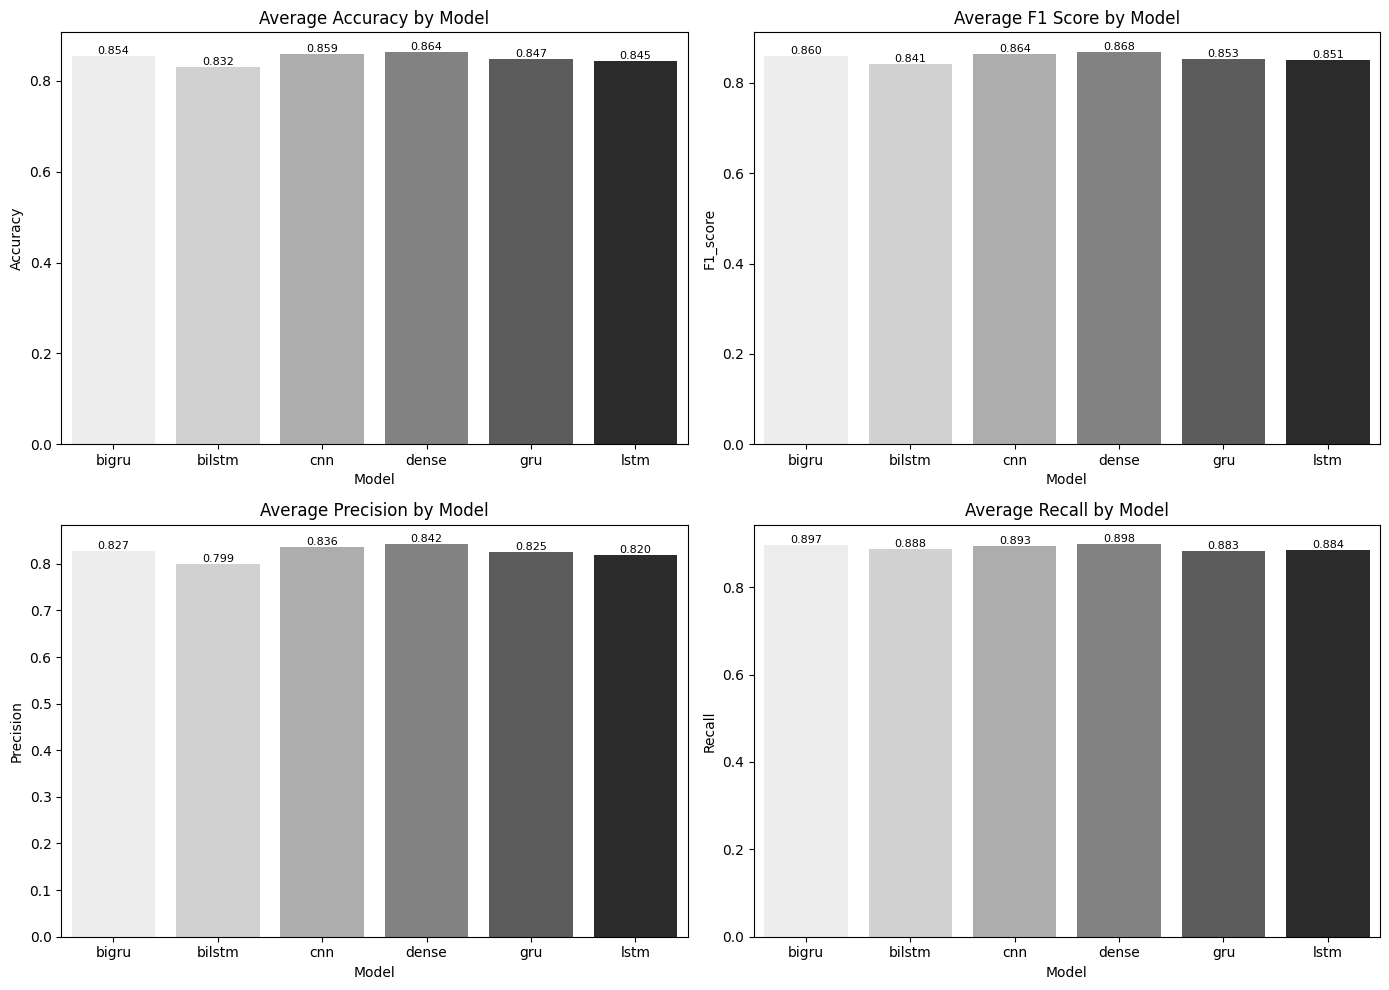

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar metrik dan judul
metrics = ['accuracy', 'f1_score', 'precision', 'recall']
titles = ['Average Accuracy by Model',
          'Average F1 Score by Model',
          'Average Precision by Model',
          'Average Recall by Model']

# Buat figure dan axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot untuk setiap metrik
for ax, metric, title in zip(axs.flat, metrics, titles):
    sns.barplot(data=result_model, x='model', y=metric, palette='Greys', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric.capitalize())

    # Tambahkan label nilai di atas bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

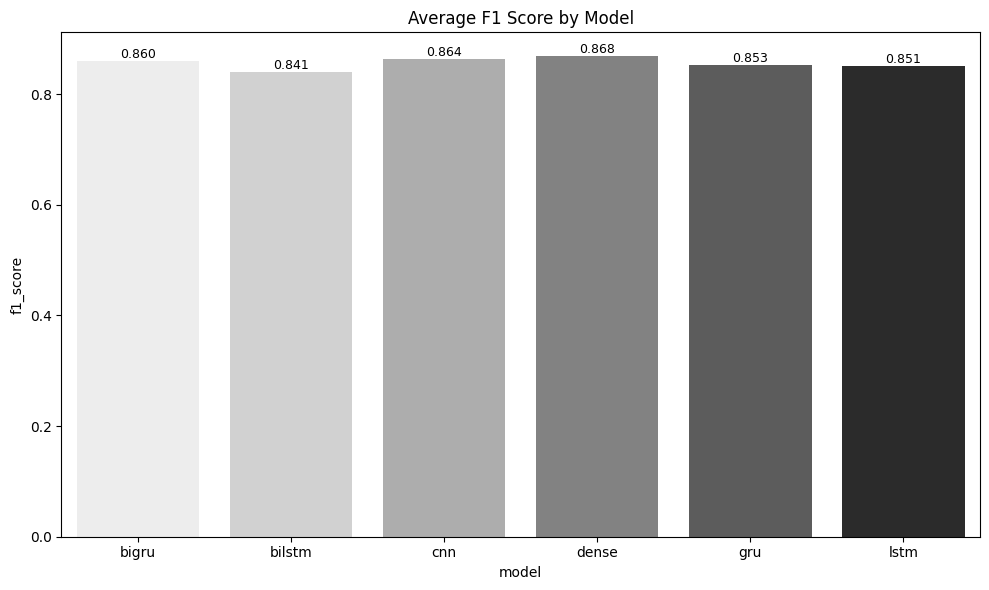

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=result_model, x='model', y='f1_score', palette='Greys')
plt.title('Average F1 Score by Model')

# Tambahkan label nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()

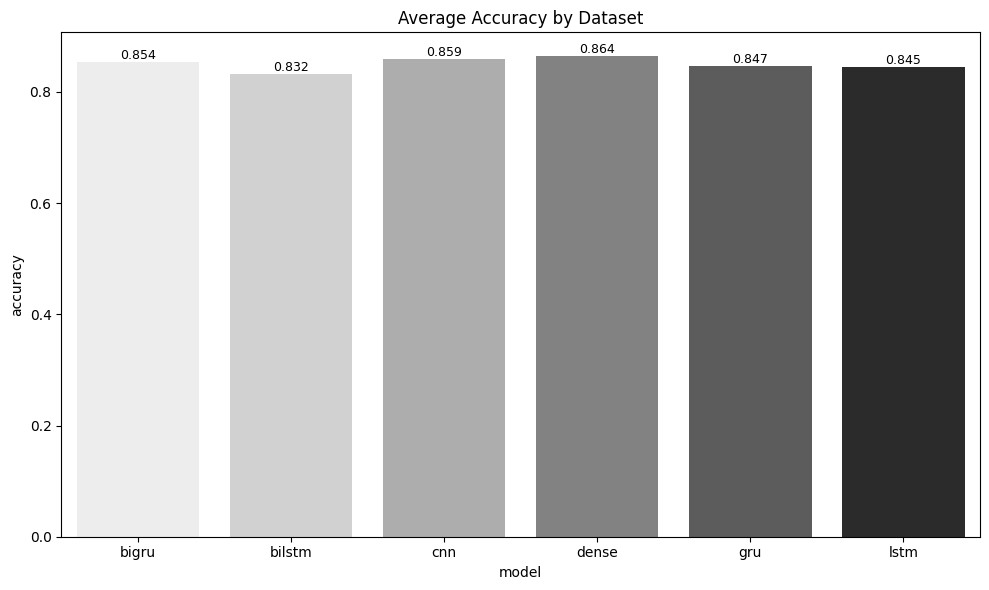

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=result_model, x='model', y='accuracy', palette='Greys')
plt.title('Average Accuracy by Dataset')

# Tambahkan label nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()

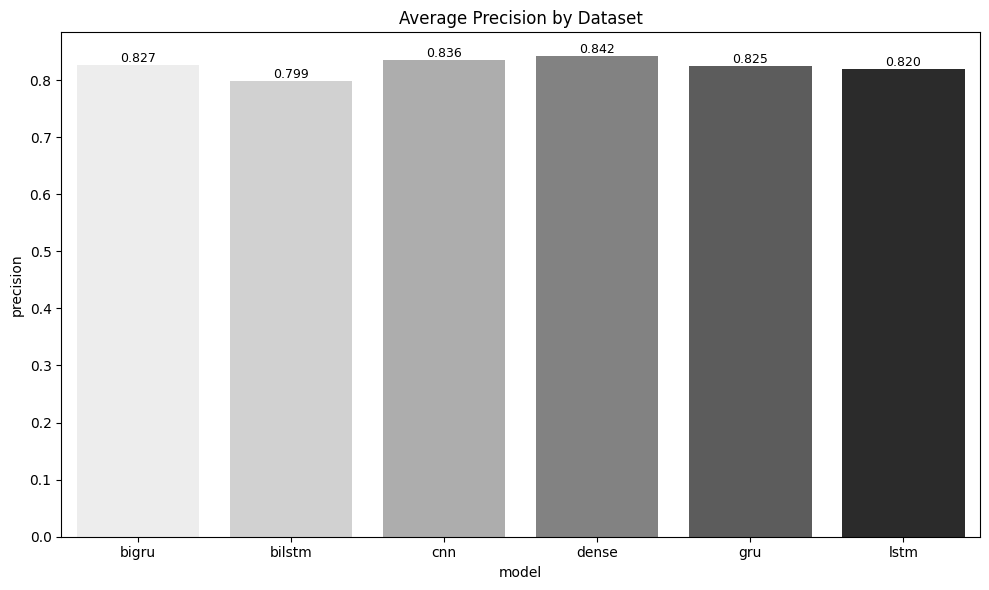

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=result_model, x='model', y='precision', palette='Greys')
plt.title('Average Precision by Dataset')

# Tambahkan label nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()

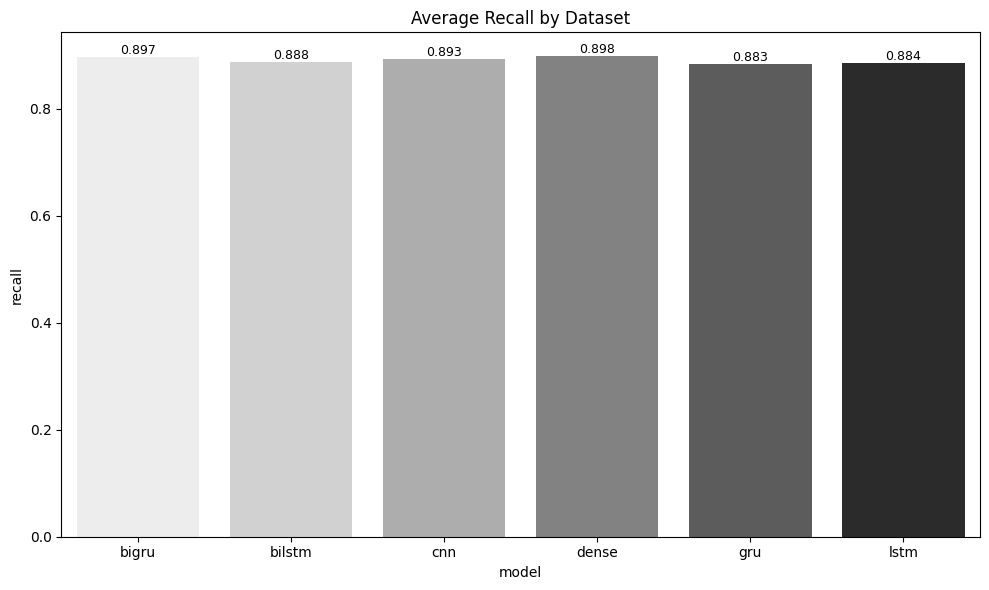

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=result_model, x='model', y='recall', palette='Greys')
plt.title('Average Recall by Dataset')

# Tambahkan label nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()

In [21]:
result = pd.read_csv(os.path.join(RESULT_FINAL_DIR, 'result.csv'))

In [22]:
result

,model,layer,fold,accuracy,precision,recall,f1_score,confusion_matrix
0,dense,1,1,0.848837,0.826087,0.883721,0.853933,"[[140, 32], [20, 152]]"
1,dense,1,2,0.854651,0.821053,0.906977,0.861878,"[[138, 34], [16, 156]]"
2,dense,1,3,0.866279,0.853933,0.883721,0.868571,"[[146, 26], [20, 152]]"
3,dense,1,4,0.880814,0.865922,0.901163,0.883191,"[[148, 24], [17, 155]]"
4,dense,1,5,0.845930,0.802030,0.918605,0.856369,"[[133, 39], [14, 158]]"
...,...,...,...,...,...,...,...,...
85,bigru,3,1,0.866279,0.850000,0.889535,0.869318,"[[145, 27], [19, 153]]"
86,bigru,3,2,0.843023,0.804124,0.906977,0.852459,"[[134, 38], [16, 156]]"
87,bigru,3,3,0.831395,0.785000,0.912791,0.844086,"[[129, 43], [15, 157]]"
88,bigru,3,4,0.843023,0.804124,0.906977,0.852459,"[[134, 38], [16, 156]]"


In [23]:
# get best row for each dataset based on f1_score
best_rows = result.loc[result.groupby('model')['f1_score'].idxmax()]
best_rows

,model,layer,fold,accuracy,precision,recall,f1_score,confusion_matrix
80,bigru,2,1,0.863372,0.830688,0.912791,0.869806,"[[140, 32], [15, 157]]"
56,bilstm,3,2,0.857558,0.839779,0.883721,0.861190,"[[143, 29], [20, 152]]"
28,cnn,3,4,0.872093,0.840426,0.918605,0.877778,"[[142, 30], [14, 158]]"
3,dense,1,4,0.880814,0.865922,0.901163,0.883191,"[[148, 24], [17, 155]]"
73,gru,3,4,0.866279,0.857955,0.877907,0.867816,"[[147, 25], [21, 151]]"
42,lstm,3,3,0.863372,0.857143,0.872093,0.864553,"[[147, 25], [22, 150]]"


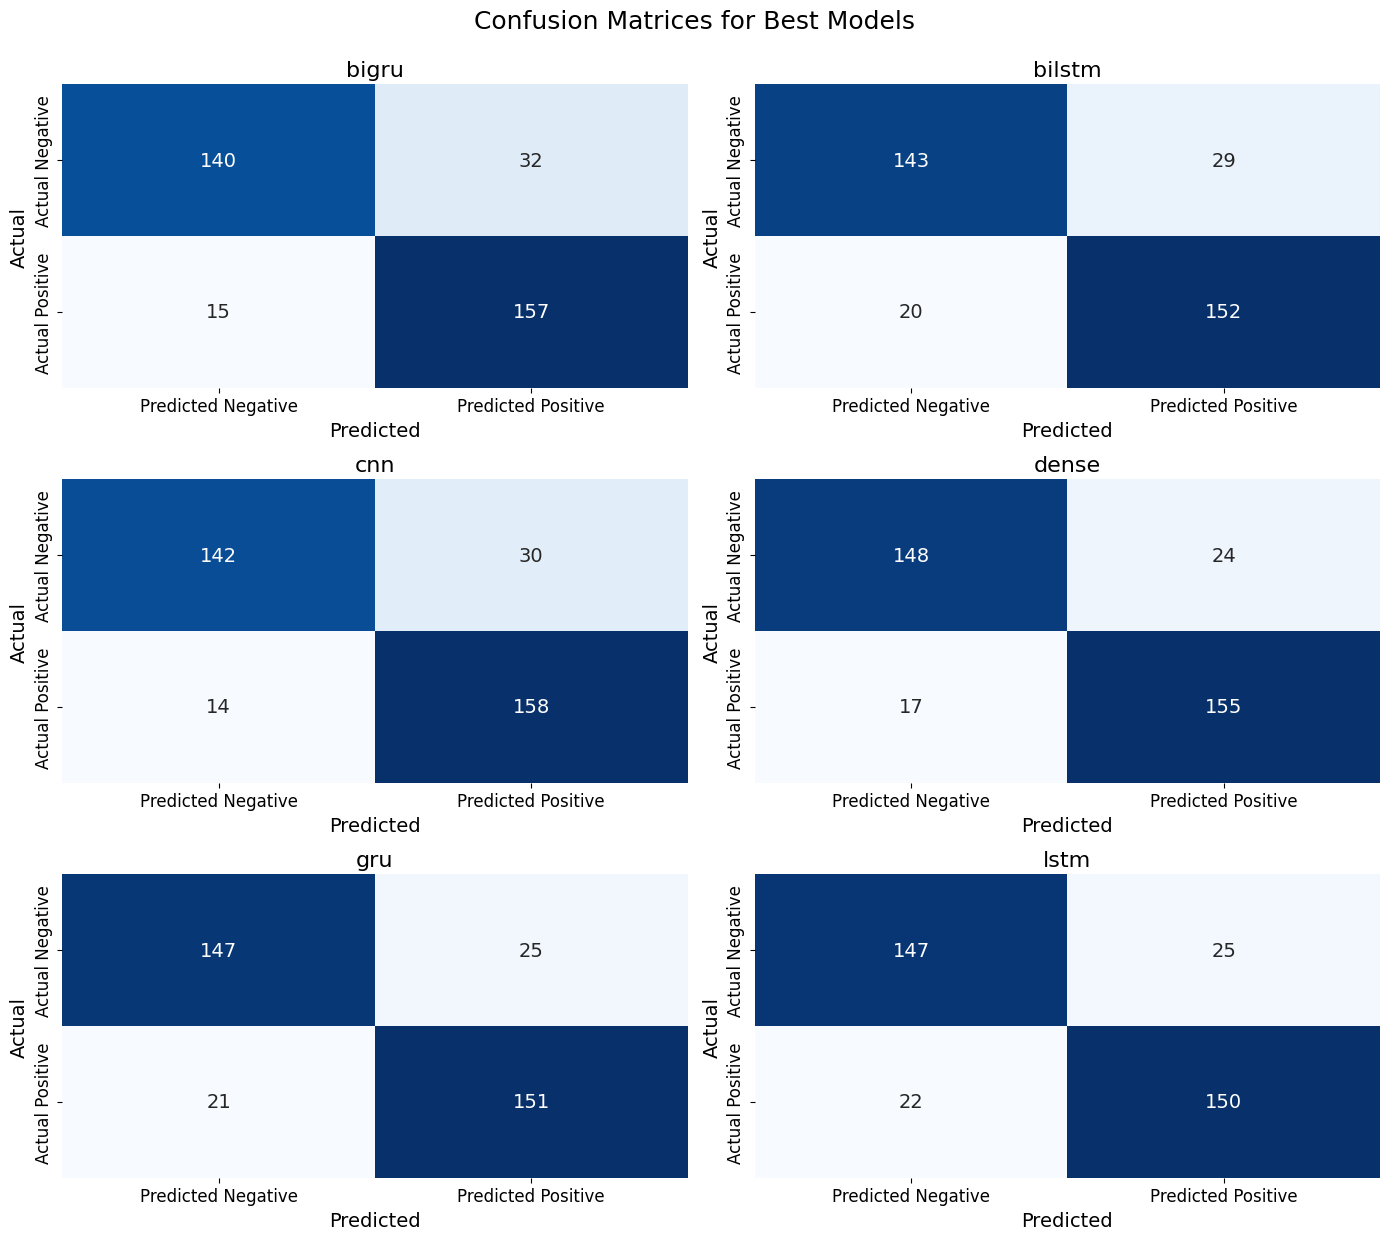

In [24]:
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom 'confusion_matrix' berisi string representasi list 2x2, misalnya '[[154, 18], [42, 130]]'
fig, axs = plt.subplots(3, 2, figsize=(14, 12))  # 3 baris x 2 kolom
axs = axs.flatten()  # Ubah jadi array 1D untuk looping mudah

for i, (index, row) in enumerate(best_rows.iterrows()):
    if i >= 6:
        break  # hanya ambil 6 model

    cm = np.array(ast.literal_eval(row['confusion_matrix']))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=['Predicted Negative', 'Predicted Positive'],
        yticklabels=['Actual Negative', 'Actual Positive'],
        ax=axs[i],
        annot_kws={"size": 14}  # Perbesar font angka
    )
    axs[i].set_title(f"{row['model']}", fontsize=16)
    axs[i].set_xlabel('Predicted', fontsize=14)
    axs[i].set_ylabel('Actual', fontsize=14)
    axs[i].tick_params(axis='both', labelsize=12)  # Perbesar label sumbu

# Hapus axis kosong jika jumlah model < 6
for j in range(i + 1, 6):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle("Confusion Matrices for Best Models", fontsize=18, y=1.03)
plt.show()

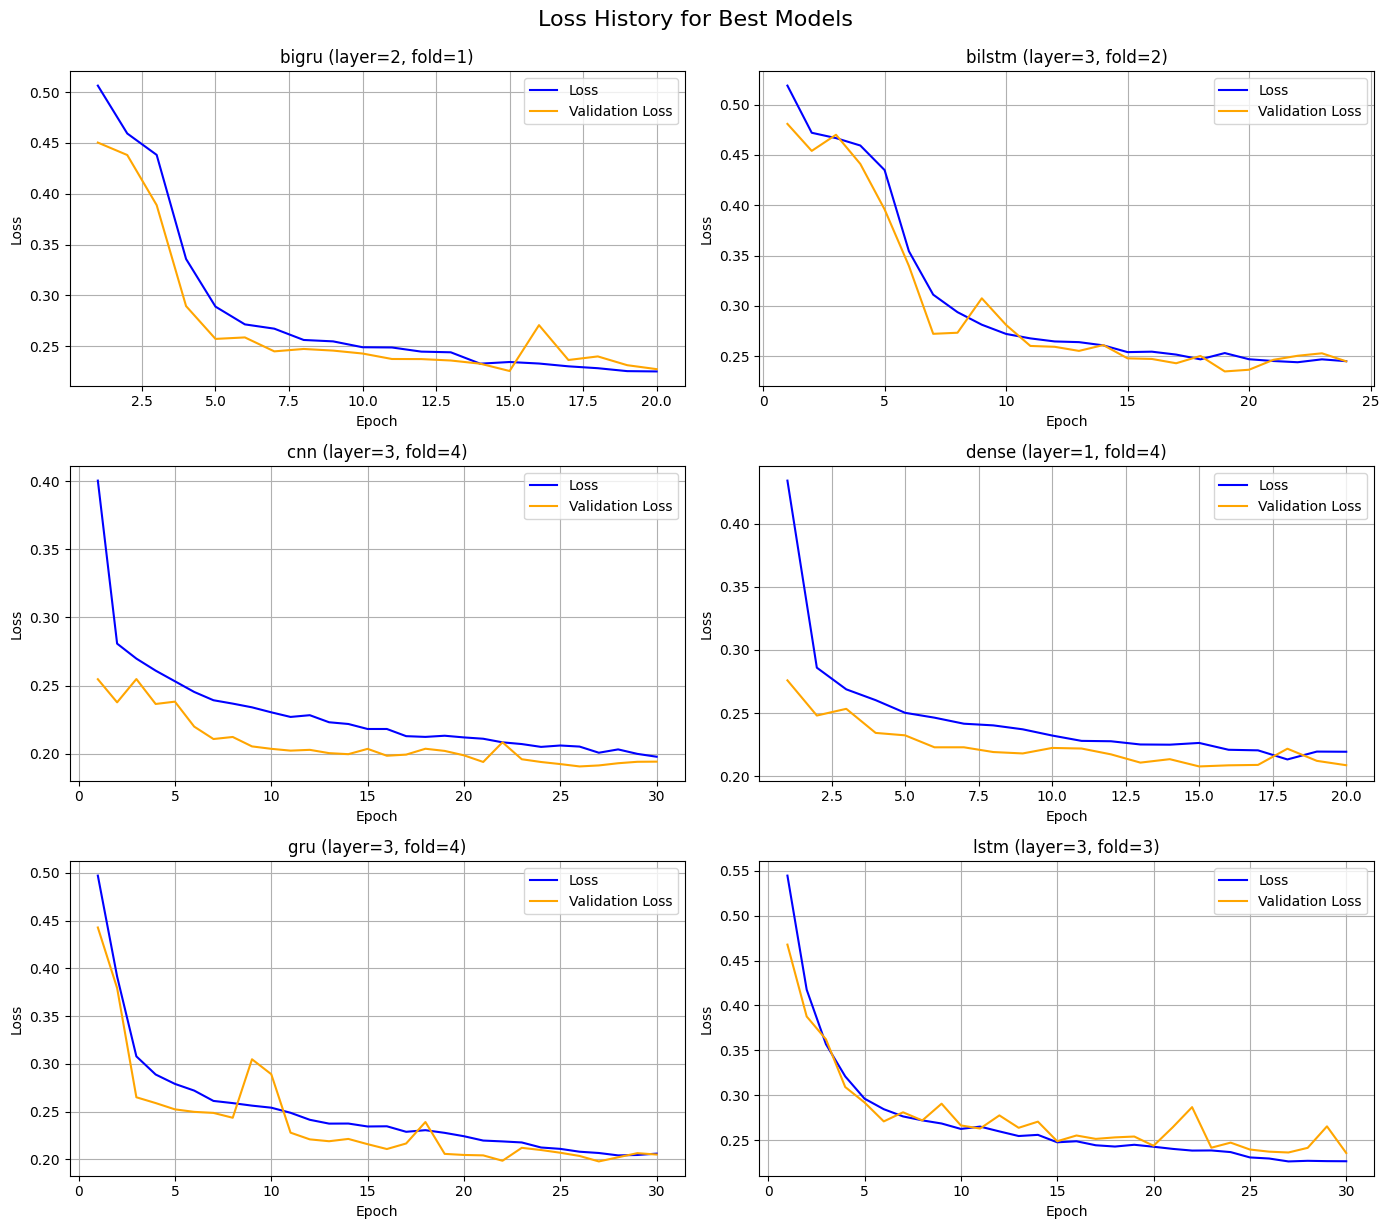

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import os

fig, axs = plt.subplots(3, 2, figsize=(14, 12))  # 2x2 grid
axs = axs.flatten()  # Flatten for easy indexing

for i, (index, row) in enumerate(best_rows.iterrows()):
    if i >= 6:
        break  # hanya 4 plot

    FILE_HISTORY = os.path.join(
        MODEL_FINAL_DIR,
        f"history_{row['model']}_layer{row['layer']}_fold{row['fold']}.csv"
    )

    history = pd.read_csv(FILE_HISTORY)
    history['epoch'] = history.index + 1

    axs[i].plot(history['epoch'], history['loss'], label='Loss', color='blue')
    axs[i].plot(history['epoch'], history['val_loss'],
                label='Validation Loss', color='orange')
    axs[i].set_title(
        f"{row['model']} (layer={row['layer']}, fold={row['fold']})")
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].legend()
    axs[i].grid()

# Hapus subplot kosong jika kurang dari 4
for j in range(i+1, 6):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle("Loss History for Best Models", fontsize=16, y=1.02)
plt.show()

In [26]:
best_rows.to_excel(os.path.join(RESULT_FINAL_DIR, 'best_rows.xlsx'), index=False)